## Gradient boosting produces an ensemble of decision trees that, on their own, are weak decision models. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

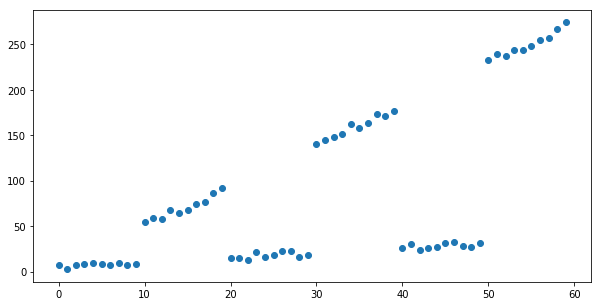

In [2]:
# Mock data
x = np.arange(0, 60)
y = list(map(lambda x: x / 2 + (x // 10) % 2 * 20 * x / 5 + np.random.random() * 10, x))
x = pd.DataFrame({'x': x})

# Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)


In [3]:
# Using linear regression to fit in this first
from sklearn.linear_model import LinearRegression
lr= LinearRegression(normalize=True)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

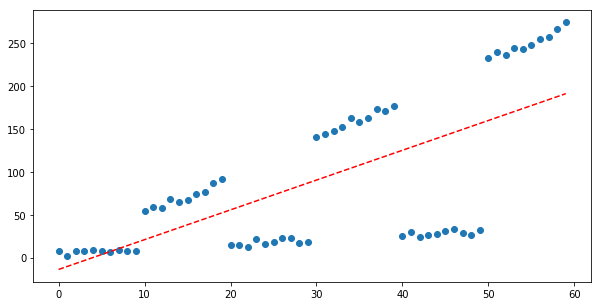

In [4]:
# Plot  data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x,lr.predict(x),'r--')

In [5]:
r= lr.score(x,y) # r2 score
#adjusted r2 """1-((1-r2)*(n-1)/n-p-1)"""
adr= 1-(((1-r)*(len(x)-1))/(len(x)-1-1)) 

print(r,adr)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(y,lr.predict(x))
mae= mean_absolute_error(y,lr.predict(x))
rmse= np.sqrt(mse)
print(mse,mae,rmse)

0.4625615755262623 0.4532953957939565
4202.105628146067 55.88916903940108 64.82365022232293


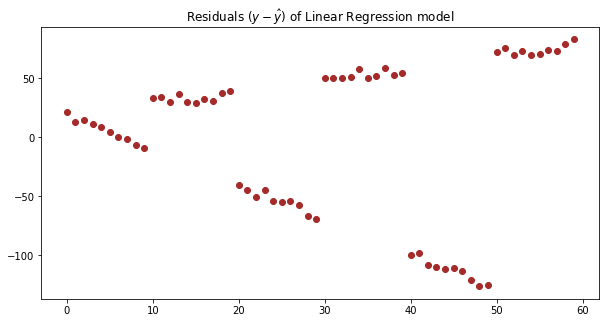

In [6]:
# Graph of residuals
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.scatter(x, y - lr.predict(x), color='brown')
plt.show()

It is also clear from this plot that there is a pattern in the residual errors, these are not random errors. We could fit model to the error terms from the output of the first model

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
params = {
    'n_estimators': 1, 
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gb= GradientBoostingRegressor(**params)

learning_rate : float, optional (default=0.1)
    learning rate shrinks the contribution of each tree by `learning_rate`.
    There is a trade-off between learning_rate and n_estimators.

n_estimators : int (default=100)
    The number of boosting stages to perform. Gradient boosting
    is fairly robust to over-fitting so a large number usually
    results in better performance.

max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. The maximum
    depth limits the number of nodes in the tree. Tune this parameter
    for best performance; the best value depends on the interaction
    of the input variables.

criterion : string, optional (default="friedman_mse")
    The function to measure the quality of a split. Supported criteria
    are "friedman_mse" for the mean squared error with improvement
    score by Friedman, "mse" for mean squared error, and "mae" for
    the mean absolute error. The default value of "friedman_mse" is
    generally the best as it can provide a better approximation in
    some cases.
    
min_samples_split : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:


min_samples_leaf : int, float, optional (default=1)
    The minimum number of samples required to be at a leaf node:    

In [9]:
gb.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
yp= gb.predict(x)

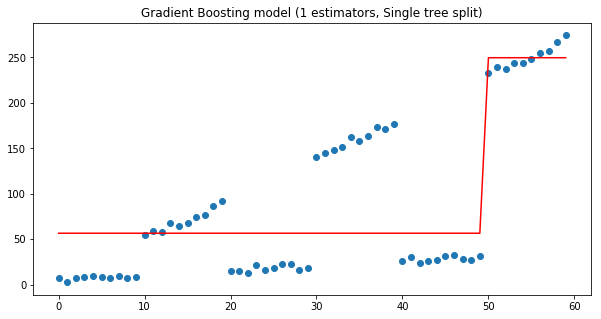

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, yp, color='r')
plt.show()

We see that the depth 1 decision tree is split at x < 50 and x >= 50, where:

If x < 50, y = 56
If x >= 50, y = 250
This isn’t the best model, but Gradient Boosting models aren’t meant to have just 1 estimator and a single tree split. So where do we go from here, let’s look again at the residuals from this model:

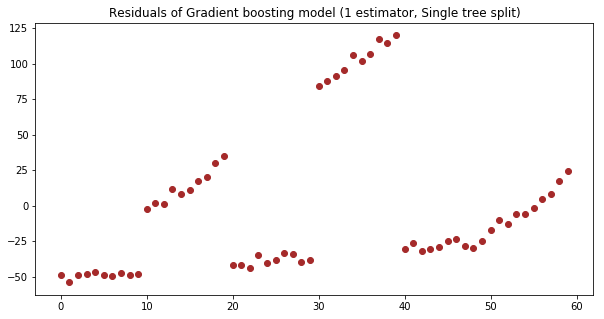

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - yp, color='brown')
plt.show()

With one estimator, the residuals between 30-40 are very high. So what if we had 2 estimators and we fed the residuals from this first tree into the next tree,

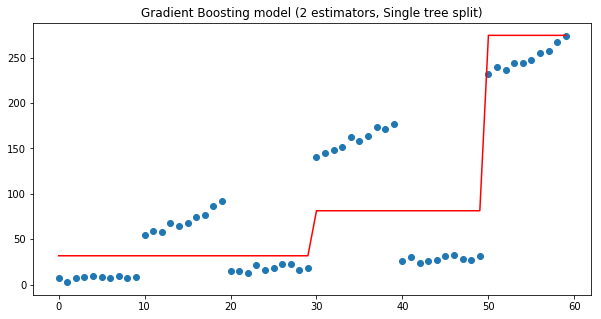

In [13]:
params = {
    'n_estimators': 2, 
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gb= GradientBoostingRegressor(**params)
gb.fit(x,y)
yp= gb.predict(x)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (2 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, yp, color='r')
plt.show()

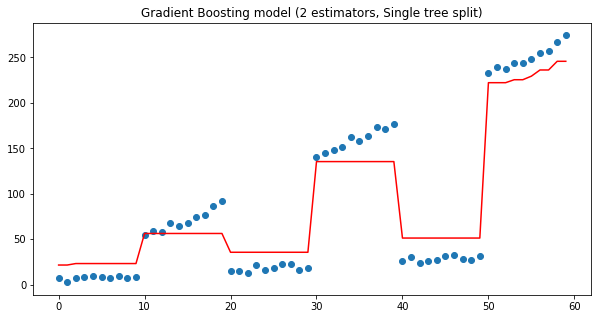

In [14]:
params = {
    'n_estimators': 10, 
    'max_depth': 2,
    'learning_rate': 0.3,
    'criterion': 'mse'
}

gb= GradientBoostingRegressor(**params)
gb.fit(x,y)
yp= gb.predict(x)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (2 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, yp, color='r')
plt.show()

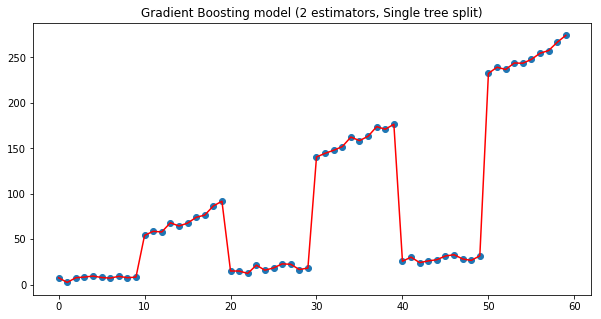

In [15]:
params = {
    'n_estimators': 20, 
    'max_depth': 5,
    'learning_rate': 1,
    'criterion': 'mse',
    
}

gb= GradientBoostingRegressor(**params)
gb.fit(x,y)
yp= gb.predict(x)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (2 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, yp, color='r')
plt.show()

0.9999999999999893 0.9999999999999891
8.372871019558281e-11 1.670615757857578e-06 9.150339348657119e-06


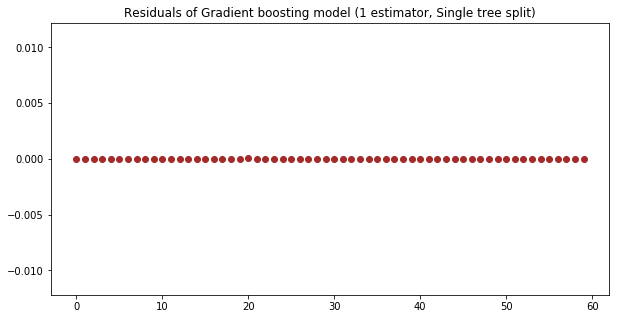

In [16]:
r= gb.score(x,y) # r2 score
#adjusted r2 """1-((1-r2)*(n-1)/n-p-1)"""
adr= 1-(((1-r)*(len(x)-1))/(len(x)-1-1)) 

print(r,adr)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(y,yp)
mae= mean_absolute_error(y,yp)
rmse= np.sqrt(mse)
print(mse,mae,rmse)

plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - yp, color='brown')
plt.show()

So if you will see above, error line is straight, r2 and adj r2 is also 1, model is overfiiting according to me.
s now i will increase the min sample leaf and splt which can effect it.


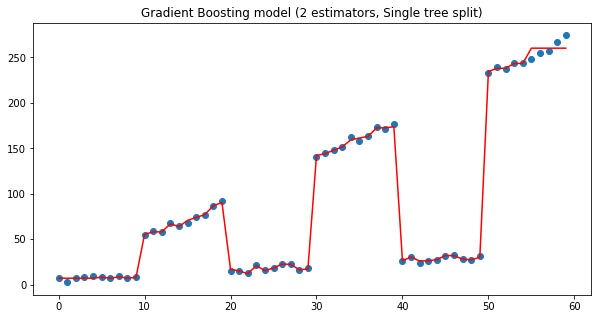

In [17]:
params = {
    'n_estimators': 20, 
    'max_depth': 5,
    'learning_rate': 1,
    'criterion': 'mse',
    'min_samples_split': 8,
    'min_samples_leaf':5
}

gb= GradientBoostingRegressor(**params)
gb.fit(x,y)
yp= gb.predict(x)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (2 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, yp, color='r')
plt.show()

0.9988734942941616 0.998854071781992
8.80788524057839 1.5339203375462722 2.9678081542745294


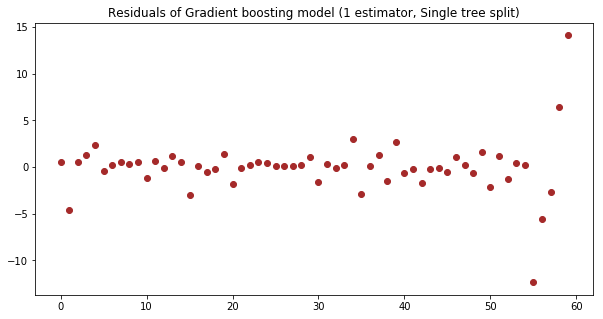

In [18]:
r= gb.score(x,y) # r2 score
#adjusted r2 """1-((1-r2)*(n-1)/n-p-1)"""
adr= 1-(((1-r)*(len(x)-1))/(len(x)-1-1)) 

print(r,adr)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(y,yp)
mae= mean_absolute_error(y,yp)
rmse= np.sqrt(mse)
print(mse,mae,rmse)

plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - yp, color='brown')
plt.show()

So Parameter Tuning is the most important things.

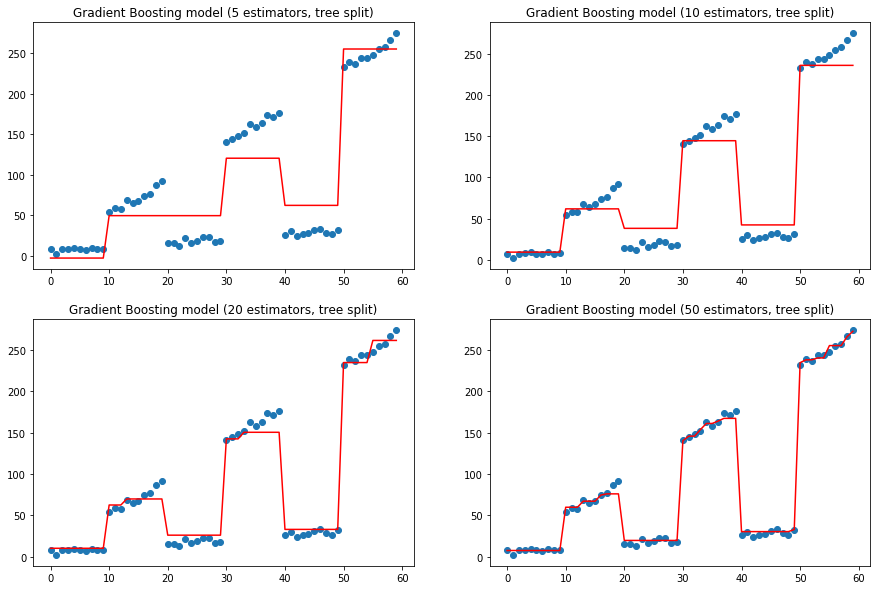

In [20]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    
    params = {
    'n_estimators': n_estimators, 
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse',
#     'min_samples_split': 8,
#     'min_samples_leaf':5
                        }

    gradient_boosting_regressor = GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model ({} estimators, tree split)'.format(n_estimators))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()